<a href="https://colab.research.google.com/github/woodstone10/deep_learning_study-python/blob/main/Prediction_Stock_analysis_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock price prediction


Reference:
- https://github.com/kairess/stock_crypto_price_prediction/blob/master/stock_samsung.ipynb



In [34]:
import numpy as np
import datetime as dt
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt

import bokeh.plotting as bk
import bokeh.layouts
import bokeh.io
import bokeh.models
from math import pi

import tensorflow as tf

**Pandas Remote Data Access**, which is simpler than web crawling

https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

---



In [22]:
end = dt.datetime.now()
#start = dt.datetime(2021, 1, 1)
span = 365*5 #days ago
start = end - dt.timedelta(days=span) 

LGE = pdr.data.DataReader('066570', 'naver', start, end).astype(float) 

In [23]:
print(SSE.head())
print(SSE.tail())

               Open     High      Low    Close    Volume
Date                                                    
2016-04-08  25380.0  25380.0  24800.0  24920.0  251868.0
2016-04-11  24920.0  25420.0  24920.0  25320.0  120693.0
2016-04-12  25400.0  25620.0  25320.0  25500.0  134054.0
2016-04-14  26000.0  26040.0  25780.0  26000.0  335327.0
2016-04-15  26180.0  26200.0  25800.0  26000.0  136599.0
               Open     High      Low    Close      Volume
Date                                                      
2021-03-31  82400.0  82700.0  81400.0  81400.0  17240518.0
2021-04-01  82500.0  83000.0  82000.0  82900.0  18676461.0
2021-04-02  84000.0  85200.0  83900.0  84800.0  22997538.0
2021-04-05  85800.0  86000.0  84800.0  85400.0  16255990.0
2021-04-06  86200.0  86200.0  85100.0  86000.0  18884541.0


# **Data**

---


In [24]:
def data(df, win_size):
  high_prices = df['High'].values
  low_prices = df['Low'].values
  mid_prices = (high_prices + low_prices) / 2

  # window
  seq_len = win_size
  sequence_length = seq_len + 1
  result = []
  for i in range(len(mid_prices) - sequence_length):
    result.append(mid_prices[i: i + sequence_length])
  #print(result)
  
  # normalize
  normalized_data = []
  for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)
  result = np.array(normalized_data)

  # split train and test data
  row = int(round(result.shape[0] * 0.9))
  train = result[:row, :]
  np.random.shuffle(train)

  x_train = train[:, :-1]
  x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
  y_train = train[:, -1]

  x_test = result[row:, :-1]
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  y_test = result[row:, -1]

  x_train.shape, x_test.shape
  return x_train, y_train, x_test, y_test

In [25]:
x_train, y_train, x_test, y_test = data(LGE, 50)

# Model

In [26]:
model = \
    tf.keras.Sequential([
        tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(50, 1)),
        tf.keras.layers.LSTM(64, return_sequences=False),       
        tf.keras.layers.Dense(1, activation='linear')
    ])

model.compile(loss='mse', 
              metrics=['accuracy'], 
              optimizer='adam')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 50, 50)            10400     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,
    epochs=20)

Epoch 1/20
106/106 [==============================] - 10s 57ms/step - loss: 0.0078 - accuracy: 9.3579e-04 - val_loss: 0.0156 - val_accuracy: 0.0085
Epoch 2/20
106/106 [==============================] - 5s 47ms/step - loss: 0.0016 - accuracy: 3.5544e-04 - val_loss: 0.0162 - val_accuracy: 0.0085
Epoch 3/20
106/106 [==============================] - 5s 50ms/step - loss: 0.0013 - accuracy: 9.1366e-05 - val_loss: 0.0092 - val_accuracy: 0.0085
Epoch 4/20
106/106 [==============================] - 5s 47ms/step - loss: 0.0010 - accuracy: 9.1366e-05 - val_loss: 0.0098 - val_accuracy: 0.0085
Epoch 5/20
106/106 [==============================] - 5s 48ms/step - loss: 0.0010 - accuracy: 9.8434e-04 - val_loss: 0.0072 - val_accuracy: 0.0085
Epoch 6/20
106/106 [==============================] - 5s 48ms/step - loss: 8.2062e-04 - accuracy: 7.6343e-04 - val_loss: 0.0056 - val_accuracy: 0.0085
Epoch 7/20
106/106 [==============================] - 5s 47ms/step - loss: 9.0026e-04 - accuracy: 0.0025 - val_lo

# Prediction

In [30]:
pred = model.predict(x_test)
pred.shape

(117, 1)

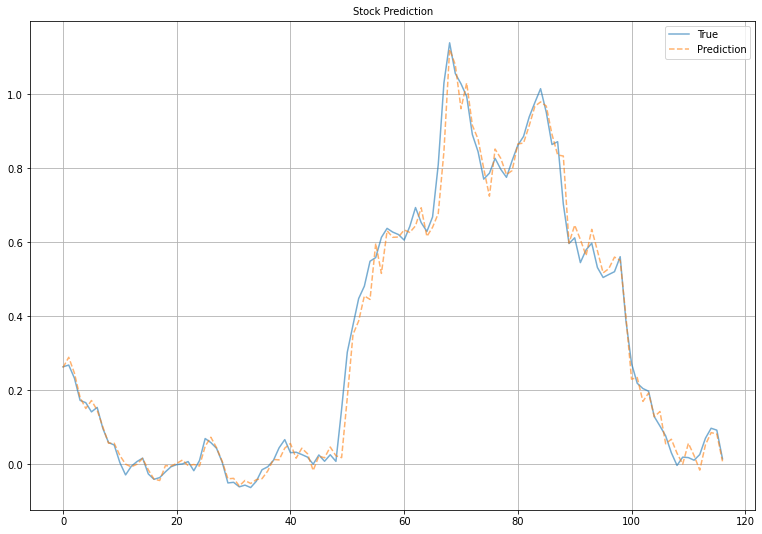

In [37]:
fig=plt.figure(figsize=(13,9))
plt.plot(y_test, label='True', linestyle='-', alpha=0.6)
plt.plot(pred, label='Prediction', linestyle='--', alpha=0.6)
plt.title('Stock Prediction', size=10)
plt.grid()
plt.legend()
plt.show()